# PHƯƠNG PHÁP HỒI QUY LOGISTIC

## Ví dụ 1

In [ ]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data by adding a column of 1s (x_0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

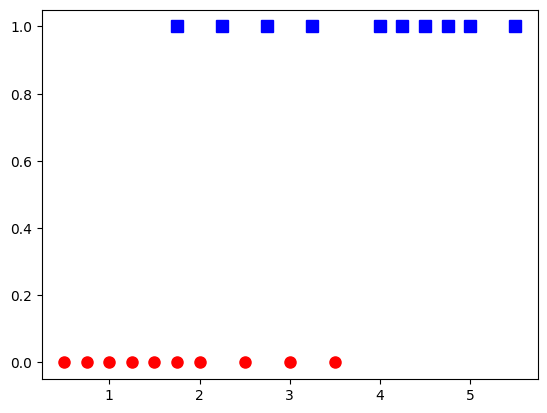

In [ ]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()

In [ ]:
def sigmoid(s):
    return 1/(1 + np.exp(-s)) # calculate sigmoid function

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    lambda_ = 0.0001
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data for stochastic gradient descent method
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi - lambda_*w[-1]
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [ ]:
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


In [ ]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


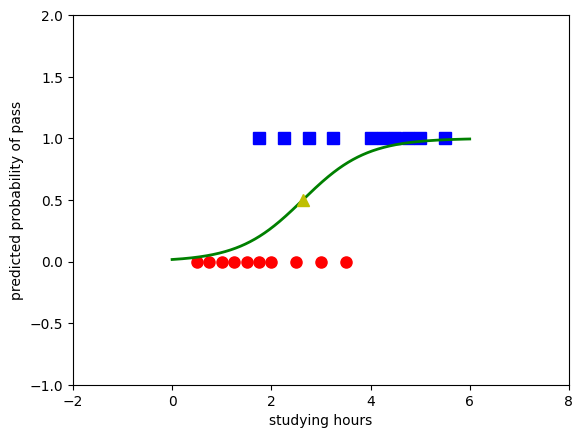

In [ ]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

In [ ]:
# Predict probabilities for new data
new_hours = np.array([[2.45], [1.85], [3.75], [3.21], [4.05]])
new_data = np.concatenate((np.ones((len(new_hours), 1)), new_hours), axis=1)
predicted_probs = sigmoid(np.dot(w[-1].T, new_data.T))

# Print predicted probabilities
print("Predicted probabilities of passing:")
print(predicted_probs)

Predicted probabilities of passing:
[[0.42839499 0.22792483 0.8494382  0.70924179 0.89989273]]


## Ví dụ 2

In [ ]:
# generate list of data points
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

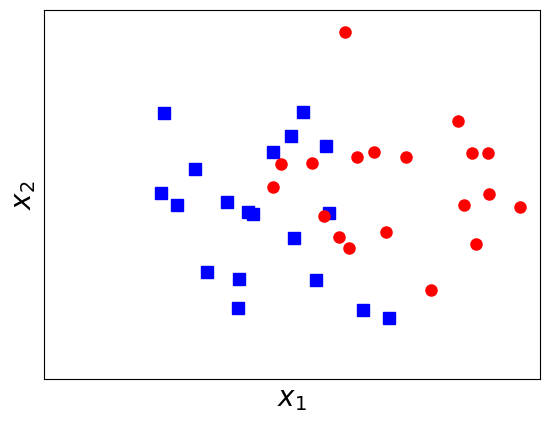

In [ ]:
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide ticks
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

# save the figure to an image first
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

In [ ]:
X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T

# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1) # initialize parameters w = w_init

# call logistic_sigmoid_regression procedure
w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)

# print out the parameter
print(w[-1])

[[-9.51043127]
 [ 2.25978315]
 [ 1.42588178]]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

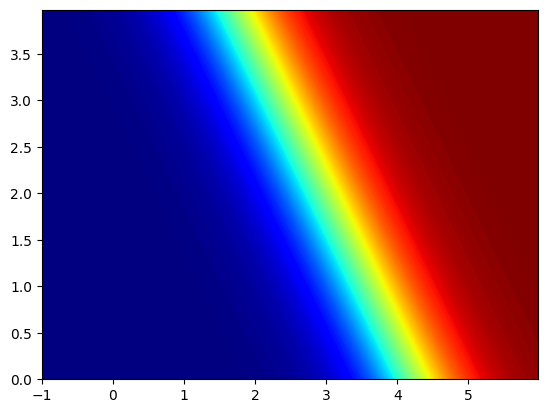

In [ ]:
# Make data.
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)

# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]

# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)

# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')

# finally, plot the data and take a look
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.show()

In [ ]:
X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T

logreg = LogisticRegression()
logreg.fit(X.T, y.ravel())
print('X = ', X)
print('Intercept: ', logreg.intercept_)
print('Coefficients: ', logreg.coef_)
print('Accuracy: ', logreg.score(X.T, y.ravel()))
print('Confusion matrix: ', metrics.confusion_matrix(y.ravel(), logreg.predict(X.T)))

## Ví dụ 3

In [ ]:
from pandas import *

In [ ]:
# reading CSV file
data = read_csv("/content/drive/MyDrive/Admission_Predict.csv")

data

In [ ]:
# Split data into X and y
X = data.iloc[:, 1:8]
X

In [ ]:
# Split data into X and y
X = data.iloc[:, 1:8]
X

In [ ]:
# converting column data to list, then convert list to array
sn = data['Serial No.'].tolist()

gre = data['GRE Score'].tolist()
X1 = np.asarray(gre)

tfl = data['TOEFL Score'].tolist()
X2 = np.asarray(tfl)

unirt = data['University Rating'].tolist()
X3 = np.asarray(unirt)

sop = data['SOP'].tolist()
X4 = np.asarray(sop)

lor1 = data['LOR '].tolist()
X5 = np.asarray(lor1)

cgpa1 = data['CGPA'].tolist()
X6 = np.asarray(cgpa1)

research_exp = data['Research'].tolist()
X7 = np.asarray(research_exp)

prob_Admit = data['Chance of Admit '].tolist()
Yt = np.asarray(prob_Admit)
# printing list data
print("Serial Numbers: ", sn[:5])
print("GRE Scores: ", X1[:5])
print("TOEFL Scores: ", X2[:5])
print("University Rating: ", X3[:5])
print("SOP Scores: ", X4[:5])
print("LOR Scores: ", X5[:5])
print("CGPA Scores: ", X6[:5])
print("Research Experience: ", X7[:5])
print("Chance of Admit: ", Yt[:5])

In [ ]:
# Split data into X and y
X = data.iloc[:, 1:8]
X


**Phân loại bằng phương pháp hồi quy Logistic**

In [ ]:
import time

# Create and train a logistic regression model
logreg = LogisticRegression(max_iter = 10000)
y_train_classified = np.where(y_train >= 0.75, 1, 0)
start_time = time.time()
logreg.fit(X_train, y_train_classified)
end_time = time.time()
print("Training time: ", end_time - start_time)

# Print the intercept and coefficients
print("Intercept: ", logreg.intercept_)
print("Coefficients:\n", logreg.coef_)

# Predict the response for test dataset
y_pred = logreg.predict(X_test)

# Calculate the accuracy, precision and recall
y_test_classified = np.where(y_test >= 0.75, 1, 0)
print("Accuracy:  ", metrics.accuracy_score(y_test_classified, y_pred))
print("Precision: ", metrics.precision_score(y_test_classified, y_pred))
print("Recall:    ", metrics.recall_score(y_test_classified, y_pred))

**Sử dụng hồi quy tuyến tính để dự đoán và tính toán bình phương sai số trung bình**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and train the model
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train, y_train)

# Print the intercept and coefficients
print('Intercept: ', linreg.intercept_)
print('Coefficients: ', linreg.coef_)

# Make predictions using the testing set
y_pred = linreg.predict(X_test)

# Mean Squared Error
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.0929167062502179


**Sử dụng Naïve Bayes để phân loại dữ liệu và tính toán thời gian chạy cùng với độ chính xác**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score
import time

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
y_train_classified = np.where(y_train >= 0.75, 1, 0)
start_time = time.time()
model.fit(X_train, y_train_classified)
end_time = time.time()
print(f'Training time: {end_time - start_time} seconds')

# Predict response for test dataset
y_pred = model.predict(X_test)

# Model Evaluation
y_test_classified = np.where(y_test >= 0.75, 1, 0)
print("Accuracy:", metrics.accuracy_score(y_test_classified, y_pred))
print("Precision:", metrics.precision_score(y_test_classified, y_pred))
print("Recall:", metrics.recall_score(y_test_classified, y_pred))

Time taken by Naïve Bayes: 0.008952140808105469
Accuracy (Naïve Bayes): 0.9
Recall (Naïve Bayes): 0.8181818181818182
Precision (Naïve Bayes): 0.9473684210526315


**Sử dụng Logistic Regression từ thư viện Scikit-Learn và so sánh kết quả**

In [ ]:
# Sử dụng Logistic Regression từ Scikit-Learn
logReg = LogisticRegression(penalty='none')

# Đo thời gian chạy
start_time = time.time()
logReg.fit(X_train.T, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print("Time taken by Logistic Regression:", elapsed_time)

# Dự đoán cho tập test
y_pred_lr = logReg.predict(X_test.T)

# Độ chính xác
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)

print("Accuracy (Logistic Regression):", accuracy_lr)
print("Recall (Logistic Regression):", recall_lr)
print("Precision (Logistic Regression):", precision_lr)

## Ví dụ 4

In [ ]:
# change to your data's path
data = pd.read_csv("/content/drive/MyDrive/banking.csv")
data.head()

In [ ]:
# convert field of 'month'
dict_month = {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}

data['month'] = data['month'].map(dict_month)

# convert field of dayOfweek
dict_day = {'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6, 'sat' : 7}
data['day_of_week'] = data['day_of_week'].map(dict_day)

# conver binary fields
#default :
data.default.replace({'no' : 0, 'yes' : 1}, inplace = True)
#housing :
data.housing.replace({'no' : 0, 'yes' : 1}, inplace = True)
#loan :
data.loan.replace({'no' : 0, 'yes' : 1}, inplace = True)

# convert categories field by one host coding
marital_dummies = pd.get_dummies(data['marital'], prefix = 'marital')
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
data = pd.concat([data, marital_dummies], axis=1)

job_dummies = pd.get_dummies(data['job'], prefix = 'job')
job_dummies.drop('job_unknown', axis=1, inplace=True)
data = pd.concat([data, job_dummies], axis=1)

education_dummies = pd.get_dummies(data['education'], prefix = 'education')
education_dummies.drop('education_unknown', axis=1, inplace=True)
data = pd.concat([data, education_dummies], axis=1)

contact_dummies = pd.get_dummies(data['contact'], prefix = 'contact')
#contact_dummies.drop('contact_unknown', axis=1, inplace=True)
data = pd.concat([data, contact_dummies], axis=1)

poutcome_dummies = pd.get_dummies(data['poutcome'], prefix = 'poutcome')
#poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
data = pd.concat([data, poutcome_dummies], axis=1)

data['pdays'] = data['pdays'].apply(lambda row: 0 if row == -1 else 1)

data.drop(['job', 'education', 'marital', 'contact', 'poutcome'], axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis=1), data['y'], test_size=0.2, random_state=42)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr, beta=1))

## Ví dụ 6

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/framingham.csv")
data = data.dropna(how="any", axis=0)
data.head(10)

In [ ]:


# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

# Huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập Validation
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)